### Credit risk scoring project

In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import accuracy_score,auc,roc_auc_score
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [6]:
!wget -P ../data 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv'

--2024-11-05 13:06:04--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-06-trees/CreditScoring.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 182489 (178K) [text/plain]
Saving to: ‘../data/CreditScoring.csv.1’

CreditScoring.csv.1 100%[===================>] 178.21K   678KB/s    in 0.3s    

2024-11-05 13:06:05 (678 KB/s) - ‘../data/CreditScoring.csv.1’ saved [182489/182489]



In [7]:
!head -n 5 ../data/CreditScoring.csv

"Status","Seniority","Home","Time","Age","Marital","Records","Job","Expenses","Income","Assets","Debt","Amount","Price"
1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
1,0,1,60,24,1,1,1,63,182,2500,0,900,1325


In [8]:
df = pd.read_csv('../data/CreditScoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Status     4455 non-null   int64
 1   Seniority  4455 non-null   int64
 2   Home       4455 non-null   int64
 3   Time       4455 non-null   int64
 4   Age        4455 non-null   int64
 5   Marital    4455 non-null   int64
 6   Records    4455 non-null   int64
 7   Job        4455 non-null   int64
 8   Expenses   4455 non-null   int64
 9   Income     4455 non-null   int64
 10  Assets     4455 non-null   int64
 11  Debt       4455 non-null   int64
 12  Amount     4455 non-null   int64
 13  Price      4455 non-null   int64
dtypes: int64(14)
memory usage: 487.4 KB


In [10]:
df .columns = df.columns.str.lower().str.replace(' ', '_')

In [11]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [12]:
df.isnull().sum()

status       0
seniority    0
home         0
time         0
age          0
marital      0
records      0
job          0
expenses     0
income       0
assets       0
debt         0
amount       0
price        0
dtype: int64

In [13]:
df.status = df.status.map({0: 'unknown', 1: 'ok',2:'default'})

In [14]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,1,60,30,2,1,3,73,129,0,0,800,846
1,ok,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,default,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,ok,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,ok,0,1,36,26,1,1,1,46,107,0,0,310,910


In [15]:
home_values = {
    1: 'rent',
    2: 'owner',
    3: 'private',
    4: 'ignore',
    5: 'parents',
    6: 'other',
    0: 'unknown'
}

df.home = df.home.map(home_values)

marital_values = {
    1: 'single',
    2: 'married',
    3: 'widow',
    4: 'separated',
    5: 'divorced',
    0: 'unknown'
}

df.marital = df.marital.map(marital_values)

records_values = {
    1: 'no',
    2: 'yes',
    0: 'unknown'
}

df.records = df.records.map(records_values)

job_values = {
    1: 'fixed',
    2: 'partime',
    3: 'freelance',
    4: 'others',
    0: 'unknown'
}

df.job = df.job.map(job_values)

In [16]:
df.head(10)

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910
5,ok,1,owner,60,36,married,no,fixed,75,214,3500,0,650,1645
6,ok,29,owner,60,44,married,no,fixed,75,125,10000,0,1600,1800
7,ok,9,parents,12,27,single,no,fixed,35,80,0,0,200,1093
8,ok,0,owner,60,32,married,no,freelance,90,107,15000,0,1200,1957
9,default,0,parents,48,41,married,no,partime,90,80,0,0,1200,1468


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4455 entries, 0 to 4454
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   status     4455 non-null   object
 1   seniority  4455 non-null   int64 
 2   home       4455 non-null   object
 3   time       4455 non-null   int64 
 4   age        4455 non-null   int64 
 5   marital    4455 non-null   object
 6   records    4455 non-null   object
 7   job        4455 non-null   object
 8   expenses   4455 non-null   int64 
 9   income     4455 non-null   int64 
 10  assets     4455 non-null   int64 
 11  debt       4455 non-null   int64 
 12  amount     4455 non-null   int64 
 13  price      4455 non-null   int64 
dtypes: int64(9), object(5)
memory usage: 487.4+ KB


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
seniority,4455.0,7.987205e+00,8.173444e+00,0.0,2.0,5.0,12.0,48.0
time,4455.0,4.644175e+01,1.465523e+01,6.0,36.0,48.0,60.0,72.0
age,4455.0,3.707767e+01,1.098486e+01,18.0,28.0,36.0,45.0,68.0
expenses,4455.0,5.556880e+01,1.951588e+01,35.0,35.0,51.0,72.0,180.0
income,4455.0,7.633170e+05,8.703625e+06,0.0,80.0,120.0,166.0,99999999.0
assets,4455.0,1.060341e+06,1.021757e+07,0.0,0.0,3500.0,6000.0,99999999.0
debt,4455.0,4.043820e+05,6.344253e+06,0.0,0.0,0.0,0.0,99999999.0
amount,4455.0,1.039022e+03,4.745430e+02,100.0,700.0,1000.0,1300.0,5000.0
price,4455.0,1.462876e+03,6.280899e+02,105.0,1117.5,1400.0,1692.0,11140.0


In [19]:
for c in ['income', 'assets', 'debt']:
    df[c] = df[c].replace(to_replace=99999999, value=np.nan)


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
seniority,4455.0,7.987205,8.173444,0.0,2.0,5.0,12.0,48.0
time,4455.0,46.441751,14.655225,6.0,36.0,48.0,60.0,72.0
age,4455.0,37.077666,10.984856,18.0,28.0,36.0,45.0,68.0
expenses,4455.0,55.568799,19.515878,35.0,35.0,51.0,72.0,180.0
income,4421.0,130.568197,86.367434,0.0,80.0,120.0,165.0,959.0
assets,4408.0,5403.433984,11573.161523,0.0,0.0,3000.0,6000.0,300000.0
debt,4437.0,342.948614,1245.861736,0.0,0.0,0.0,0.0,30000.0
amount,4455.0,1039.021773,474.543007,100.0,700.0,1000.0,1300.0,5000.0
price,4455.0,1462.875645,628.089913,105.0,1117.5,1400.0,1692.0,11140.0


In [21]:
df.status.value_counts()

status
ok         3200
default    1254
unknown       1
Name: count, dtype: int64

In [22]:
df = df[df.status != 'unknown'].reset_index(drop=True)

In [23]:
df.status.value_counts()

status
ok         3200
default    1254
Name: count, dtype: int64

In [24]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129.0,0.0,0.0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131.0,0.0,0.0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200.0,3000.0,0.0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182.0,2500.0,0.0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107.0,0.0,0.0,310,910


In [25]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=11)


In [26]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)


In [27]:
y_train  = df_train.status.map({'ok': 0, 'default': 1})
y_val = df_val.status.map({'ok': 0, 'default': 1})
y_test = df_test.status.map({'ok': 0, 'default': 1})

In [28]:
del df_train['status']
del df_val['status']
del df_test['status']

In [29]:
df_train.head()

,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,10,owner,36,36,married,no,freelance,75,0.0,10000.0,0.0,1000,1400
1,6,parents,48,32,single,yes,fixed,35,85.0,0.0,0.0,1100,1330
2,1,parents,48,40,married,no,fixed,75,121.0,0.0,0.0,1320,1600
3,1,parents,48,23,single,no,partime,35,72.0,0.0,0.0,1078,1079
4,5,owner,36,46,married,no,freelance,60,100.0,4000.0,0.0,1100,1897


In [30]:
def decision(client):
    if client['records'] == 'yes':
        if client['job'] == 'partime':
            return 'default'
        else:
            return 'ok'
    else:
        if client['assets'] > 6000:
            return 'ok'
        else:
            return 'default'

In [31]:
x = df_train.iloc[0].to_dict()
x

{'seniority': 10,
 'home': 'owner',
 'time': 36,
 'age': 36,
 'marital': 'married',
 'records': 'no',
 'job': 'freelance',
 'expenses': 75,
 'income': 0.0,
 'assets': 10000.0,
 'debt': 0.0,
 'amount': 1000,
 'price': 1400}

In [32]:
decision(x)

'ok'

In [33]:
train_dict = df_train.to_dict(orient='records')

In [34]:
dv = DictVectorizer(sparse=False)

In [35]:
X_train = dv.fit_transform(train_dict)

In [36]:
dv.get_feature_names_out()

array(['age', 'amount', 'assets', 'debt', 'expenses', 'home=ignore',
       'home=other', 'home=owner', 'home=parents', 'home=private',
       'home=rent', 'home=unknown', 'income', 'job=fixed',
       'job=freelance', 'job=others', 'job=partime', 'job=unknown',
       'marital=divorced', 'marital=married', 'marital=separated',
       'marital=single', 'marital=unknown', 'marital=widow', 'price',
       'records=no', 'records=yes', 'seniority', 'time'], dtype=object)

In [37]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [38]:
val_dict = df_val.to_dict(orient='records')
X_val = dv.transform(val_dict)

In [39]:
y_pred = dt.predict_proba(X_val)

In [40]:
roc_auc_score(y_val, y_pred[:, 1])

0.7389079944782155

In [41]:
y_pred = dt.predict_proba(X_train)
roc_auc_score(y_train, y_pred[:, 1])

0.7761016984958594

In [42]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- records=no <= 0.50
|   |--- seniority <= 6.50
|   |   |--- amount <= 862.50
|   |   |   |--- class: 0
|   |   |--- amount >  862.50
|   |   |   |--- class: 1
|   |--- seniority >  6.50
|   |   |--- income <= 103.50
|   |   |   |--- class: 1
|   |   |--- income >  103.50
|   |   |   |--- class: 0
|--- records=no >  0.50
|   |--- job=partime <= 0.50
|   |   |--- income <= 74.50
|   |   |   |--- class: 0
|   |   |--- income >  74.50
|   |   |   |--- class: 0
|   |--- job=partime >  0.50
|   |   |--- assets <= 8750.00
|   |   |   |--- class: 1
|   |   |--- assets >  8750.00
|   |   |   |--- class: 0



In [43]:
for d in [1,2,3, 4, 5, 6, 7, 10, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=d)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)
    auc = roc_auc_score(y_val, y_pred[:, 1])
    print(d, round(auc,2))


1 0.61
2 0.67
3 0.74
4 0.76
5 0.77
6 0.75
7 0.74
10 0.68
15 0.66
20 0.66
None 0.65


In [44]:
scores = []
for i in [4,5,6,7,10,15,20,None]:
  for j in [1,2,5,10,15,20,100,200,500]:
    dt = DecisionTreeClassifier(max_depth=i,min_samples_leaf=j)
    dt.fit(X_train, y_train)

    y_pred = dt.predict_proba(X_val)
    auc = roc_auc_score(y_val, y_pred[:, 1])
    scores.append((i,j, round(auc,4)))

In [45]:
columns = ['max_depth','min_samples_leaf','auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores

,max_depth,min_samples_leaf,auc
0,4.0,1,0.7607
1,4.0,2,0.7607
2,4.0,5,0.7607
3,4.0,10,0.7607
4,4.0,15,0.7632
...,...,...,...
67,NaN,15,0.7874
68,NaN,20,0.7808
69,NaN,100,0.7799
70,NaN,200,0.7689


In [46]:
df_scores.sort_values(by='auc', ascending=False)

,max_depth,min_samples_leaf,auc
40,10.0,15,0.7904
49,15.0,15,0.7882
67,NaN,15,0.7874
31,7.0,15,0.7865
58,20.0,15,0.7860
...,...,...,...
8,4.0,500,0.6798
36,10.0,1,0.6733
45,15.0,1,0.6665
63,NaN,1,0.6647


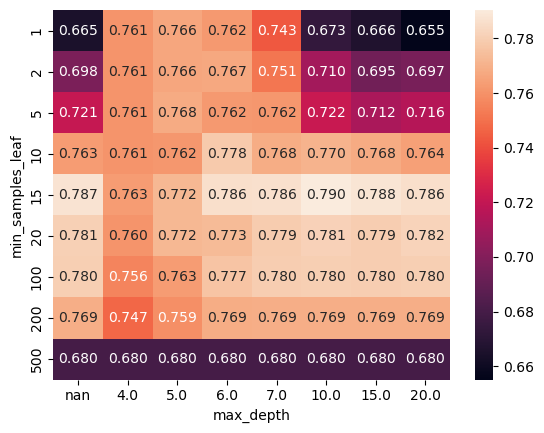

In [47]:
sns.heatmap(df_scores.pivot(index='min_samples_leaf', columns='max_depth', values='auc'), annot=True, fmt=".3f")
plt.show()

In [48]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)

In [49]:
rf = RandomForestClassifier(n_estimators=100, random_state=11)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=11)

In [50]:
y_pred = rf.predict_proba(X_val)[:,1]

In [51]:
roc_auc_score(y_val, y_pred)

0.8155621079654163

In [52]:
rf.predict_proba(X_val[[0]])

array([[0.89, 0.11]])

In [53]:
scores = []
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=11)
    rf.fit(X_train, y_train)

    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    scores.append((n, auc))

In [54]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,0.772572
1,20,0.800740
2,30,0.809232
3,40,0.814112
4,50,0.815723
5,60,0.816849
6,70,0.816074
7,80,0.817182
8,90,0.815683
9,100,0.815562


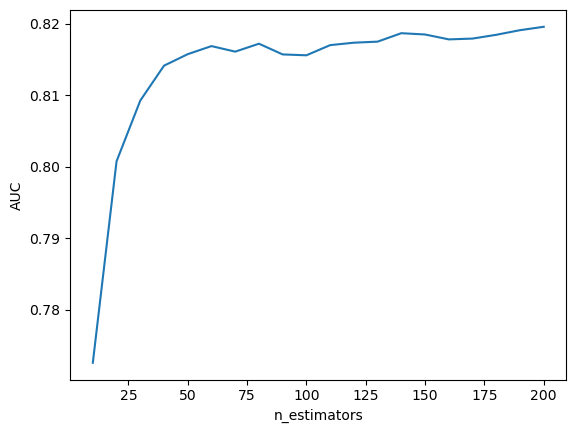

In [55]:
plt.plot(df_scores.n_estimators, df_scores.auc)
plt.xlabel('n_estimators')
plt.ylabel('AUC')
plt.show()

In [56]:
scores = []
for d in [5, 10, 15]:
  for n in range(10, 201, 10):
      rf = RandomForestClassifier(n_estimators=n, max_depth= n, random_state=11)
      rf.fit(X_train, y_train)

      y_pred = rf.predict_proba(X_val)[:, 1]
      auc = roc_auc_score(y_val, y_pred)
      scores.append((n,d, auc))

In [57]:
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'max_depth','auc'])
df_scores.head()

,n_estimators,max_depth,auc
0,10,5,0.802963
1,20,5,0.800934
2,30,5,0.809232
3,40,5,0.814112
4,50,5,0.815723


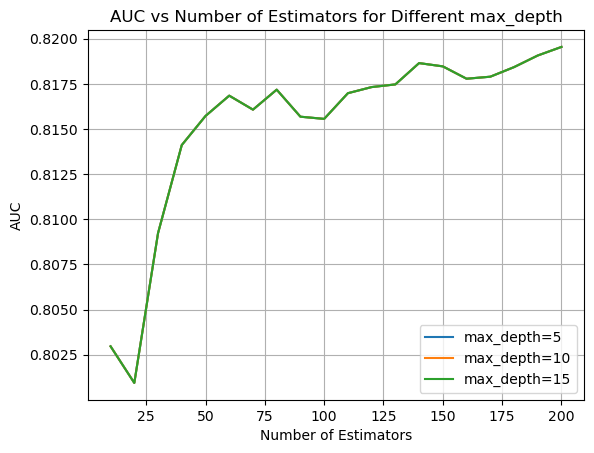

In [58]:
for d in [5, 10, 15]:
  df_subset = df_scores[df_scores['max_depth'] == d]
  plt.plot(df_subset.n_estimators, df_subset.auc, label=f'max_depth={d}')

plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('AUC')
plt.title('AUC vs Number of Estimators for Different max_depth')
plt.grid(True)  
plt.show()

In [59]:
scores = []
for s in [1,3,5, 10, 50]:
  for n in range(10, 201, 10):
      rf = RandomForestClassifier(n_estimators=n, max_depth= 10, min_samples_leaf= s, random_state=11)
      rf.fit(X_train, y_train)

      y_pred = rf.predict_proba(X_val)[:, 1]
      auc = roc_auc_score(y_val, y_pred)
      scores.append((s, n, auc))

In [60]:
df_scores = pd.DataFrame(scores, columns=['min_sample_leaf','n_estimators','auc'])
df_scores.head()

,min_sample_leaf,n_estimators,auc
0,1,10,0.802963
1,1,20,0.816086
2,1,30,0.817917
3,1,40,0.820043
4,1,50,0.821556


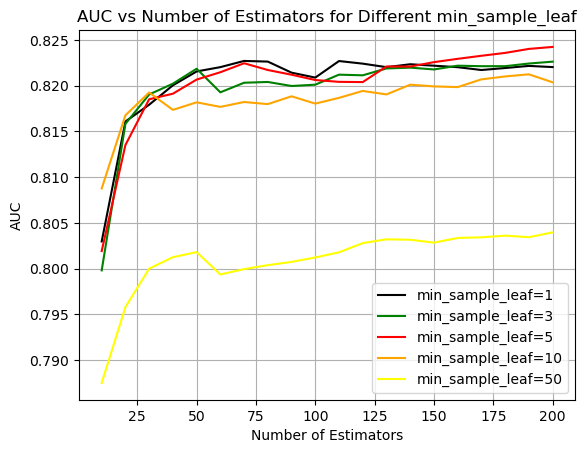

In [61]:
color = ['black','green','red','orange','yellow']
min_sample_leaf = [1,3,5,10,50]
zipObj = zip(min_sample_leaf, color)
for s,col in zipObj:
  df_subset = df_scores[df_scores['min_sample_leaf'] == s]
  plt.plot(df_subset.n_estimators, df_subset.auc, color = col,label=f'min_sample_leaf={s}')

plt.legend()
plt.xlabel('Number of Estimators')
plt.ylabel('AUC')
plt.title('AUC vs Number of Estimators for Different min_sample_leaf')  
plt.grid(True)  
plt.show()

In [68]:
rf = RandomForestClassifier(n_estimators=200, max_depth= 10, min_samples_leaf=3, random_state=11)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=11)

In [69]:
y_pred = rf.predict_proba(X_val)[:,1]

In [70]:
roc_auc_score(y_val, y_pred)

0.8226278123562035